Métodos para otimização multiobjetivos: NSGA-II; Multiple-objective Branch-and-Bound; Normal Boundary Intersection (NBI); Modified Normal Boundary Intersection (NBIm); Normal Constraint (NC); Successive Pareto Optimization (SPO); Directed Search Domain (DSD); Pareto surface generation for convex multi-objective instances (PGEN); Indirect Optimization on the basis of Self-Organization (IOSO); S-metric selection evolutionary multi-objective algorithm (SMS-EMOA); Approximation-Guided Evolution (AGE); Reactive Search Optimization (RSO); Multi-objective particle swarm optimization (MOPSO).

NSGA - Non-dominated Sorting Genetic Algorithm ou Algoritmo Genético de Classificação Não Dominado é uma metaheurística para otimização multiobjetivo que pode ser denominada de "programação multiobjetivo" ou "otimização vetorial" ou "otimização multicritério" ou "otimização multiatributo" ou "otimização de Pareto", sendo uma área de tomada de decisão com múltiplos objetivos a serem otimizados simultaneamente de dois ou mais objetivos conflitantes.

Deb, K.; Pratap, A.; Agarwal, S.; Meyarivan, T. A fast and elitist multiobjective genetic algorithm: NSGA-II. IEEE Transactions on Evolutionary Computation (Volume: 6, Issue: 2). https://doi.org/10.1109/4235.996017, 2002.

In [ ]:
#instala biblioteca Orange Canvas e pymoo (otimização multiobjetivo)
!pip install Orange3
!pip install pymoo

In [ ]:
#importa bibliotecas
import Orange
import random
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from numpy.random import choice
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [ ]:
#define os hiperparâmetros
DIMENSOES = 2 #determina a quantidade de dimensões do problema
ITERACOES = 200 #quantiddade máxima de ciclos (episódios) especificando quantas explorações podem ser realizadas
POPULACAO = 20 #tamanho da população correspondente ao indivíduo
E1 = -100 #extremo esquerdo eixo x
E2 = 100 #extremo direito eixo x
E3 = -100 #extremo inferior eixo y
E4 = 100 #extremo superior eixo y
LIMITES = [E3, E4] #LIMITES = [E1,E4] #(bound) determina os valores mínimos e máximos do espaço de busca
FCUSTO = 'zdt5' #(fitness) define a aptidão do agente imunológico na possível solução do problema ('zdt1','zdt5')
SEMENTE=1 #valor de inicialização
VERBO=False #Se a saída deve ser impressa ou não
CHAMADA = '' #objeto retornado em cada iteração
INDIVIDUOS = [] #(swarm) array da criação dos indivíduos da população
PESOS = [0.2,0.2] #f(x) = (0.2α + 0.2β + 0.1γ + 0.1δ + 0.1ε + 0.3θ) / 0.10

In [ ]:
#importa dados
from google.colab import files  
files.upload()

In [ ]:
#instancia objeto de dados com base no caminho gerado na importação do arquivo
dados = Orange.data.Table("/content/dados.csv")

In [ ]:
#explora os metadados e dados da arquivo importado
qtde_campos = len(dados.domain.attributes)
qtde_cont = sum(1 for a in dados.domain.attributes if a.is_continuous)
qtde_disc = sum(1 for a in dados.domain.attributes if a.is_discrete)
print("%d metadados: %d continuos, %d discretos" % (qtde_campos, qtde_cont, qtde_disc))
print("Nome dos metadados:", ", ".join(dados.domain.attributes[i].name for i in range(qtde_campos)),)
dados.domain.attributes #explora os domínios dos atributos (campos da base de dados)
print("Registros:", len(dados)) #explora os dados (quantidade de registros da base de dados)
i = 0 #exibe os primeiros registros para análise dos dados importados
for d in dados[:20]:
  i += 1
  print(i, d)

In [ ]:
#cria arrays das dimensões do problema a ser otimizado
processo = []
periodo = []
complexidade = [] #1-muito baixa complexidade;2-baixa complexidade;3-média complexidade;4-alta complexidade;e,5-muito alta complexidade
pagina = []
prazo = []
revisao = []
entrega = []
valor = []
i = 0
for d in dados[:POPULACAO]:
  processo.append(d[0])
  periodo.append(d[1])
  complexidade.append(d[2])
  pagina.append(d[3])
  prazo.append(d[4])
  revisao.append(d[5])
  entrega.append(d[6])
  valor.append(d[7])
  print("id:",i,"processo:",processo[i],"período:",periodo[i],"complexidade:",complexidade[i],"página:",pagina[i],"prazo:",prazo[i],"revisões:",revisao[i],"entrega:",entrega[i],"valor:",valor[i])
  i += 1

In [ ]:
#inicializa população (indivíduos)
populacao = []
for i in range(POPULACAO):
  cpx = complexidade[i]
  pag = pagina[i]
  prz = prazo[i]
  rev = revisao[i]
  ent = entrega[i]
  val = valor[i]
  posicao = 0
  individuo = []
  for j in range(DIMENSOES):
    if (j==0):
      posicao = cpx
    elif (j==1):
      posicao = pag
    elif (j==2):
      posicao = prz
    elif (j==3):
      posicao = rev
    elif (j==4):
      posicao = ent
    elif (j==5):
      posicao = val
    else:
      posicao = random.random()*(LIMITES[1]-LIMITES[0]) - LIMITES[1]
    individuo.append(posicao)
  populacao.append(individuo)
  INDIVIDUOS = np.array(populacao) #([[0.5, 0.2], [0.1, 0.6]])
  print("indivíduo:",i,"indivíduo:",populacao[i])

indivíduo: 0 indivíduo: [Value('COMPLEXIDADE', 3), Value('PAGINA', 12)]
indivíduo: 1 indivíduo: [Value('COMPLEXIDADE', 3), Value('PAGINA', 20)]
indivíduo: 2 indivíduo: [Value('COMPLEXIDADE', 3), Value('PAGINA', 55)]
indivíduo: 3 indivíduo: [Value('COMPLEXIDADE', 4), Value('PAGINA', 43)]
indivíduo: 4 indivíduo: [Value('COMPLEXIDADE', 2), Value('PAGINA', 24)]
indivíduo: 5 indivíduo: [Value('COMPLEXIDADE', 1), Value('PAGINA', 93)]
indivíduo: 6 indivíduo: [Value('COMPLEXIDADE', 3), Value('PAGINA', 44)]
indivíduo: 7 indivíduo: [Value('COMPLEXIDADE', 2), Value('PAGINA', 37)]
indivíduo: 8 indivíduo: [Value('COMPLEXIDADE', 1), Value('PAGINA', 11)]
indivíduo: 9 indivíduo: [Value('COMPLEXIDADE', 1), Value('PAGINA', 10)]
indivíduo: 10 indivíduo: [Value('COMPLEXIDADE', 2), Value('PAGINA', 32)]
indivíduo: 11 indivíduo: [Value('COMPLEXIDADE', 2), Value('PAGINA', 13)]
indivíduo: 12 indivíduo: [Value('COMPLEXIDADE', 1), Value('PAGINA', 14)]
indivíduo: 13 indivíduo: [Value('COMPLEXIDADE', 3), Value('PA

In [ ]:
#calcula o multiobjetivo
problem = get_problem(FCUSTO) #n_var=POPULACAO
pf = problem.pareto_front()
algorithm = NSGA2(
  ref_points=INDIVIDUOS,
  pop_size=POPULACAO,
  epsilon=0.01,
  normalization='front',
  extreme_points_as_reference_points=False,
  weights=np.array(PESOS))
res = minimize(problem,
  algorithm,
  save_history=True,
  termination=('n_gen',ITERACOES),
  seed=SEMENTE,
  pf=pf,
  disp=False,
  verbose=VERBO)

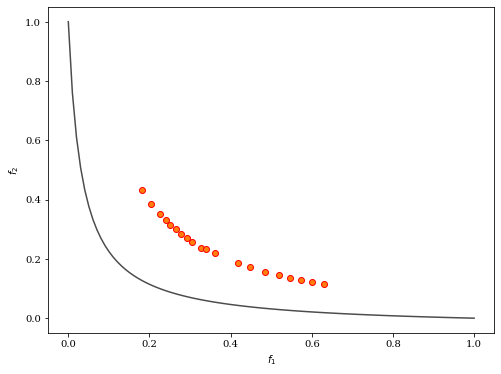

In [ ]:
#plota o resultado
plot = Scatter()
plot.add(pf, label="pf", plot_type="line", color="black", alpha=0.7)
plot.add(res.F, label="F", edgecolor="red")
#plot.add(ref_points, label="indivíduos") #facecolor="none",
plot.show()

No handles with labels found to put in legend.


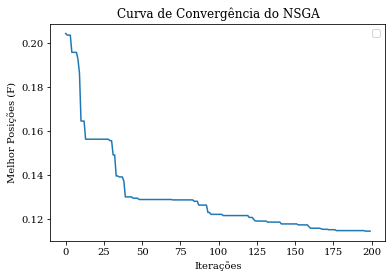

In [ ]:
#exibe curva de convergência dos indivíduos
ret = [np.min(e.pop.get("F")) for e in res.history]
plt.plot(np.arange(len(ret)), ret)
plt.title("Curva de Convergência do NSGA")
plt.xlabel("Iterações")
plt.ylabel("Melhor Posições (F)")
plt.legend()
plt.show()

In [ ]:
#otimizações calculadas
for i in range(POPULACAO):
  print("i:",i,"otimização:",res.F[i])
#print("NSGA2: Melhor Solução: \nX = %s\nF = %s" % (res.X, res.F))

i: 0 otimização: [0.6294933  0.11465537]
i: 1 otimização: [0.18271705 0.43245894]
i: 2 otimização: [0.44727597 0.17093871]
i: 3 otimização: [0.48525295 0.15658057]
i: 4 otimização: [0.51803312 0.14606665]
i: 5 otimização: [0.30514853 0.25606114]
i: 6 otimização: [0.60018542 0.12123912]
i: 7 otimização: [0.41698066 0.18579694]
i: 8 otimização: [0.25122031 0.31375815]
i: 9 otimização: [0.26527829 0.30004357]
i: 10 otimização: [0.27868525 0.28400922]
i: 11 otimização: [0.29307854 0.27175742]
i: 12 otimização: [0.54607496 0.13609868]
i: 13 otimização: [0.32809334 0.23703383]
i: 14 otimização: [0.22719942 0.35129359]
i: 15 otimização: [0.24099069 0.33219423]
i: 16 otimização: [0.57225453 0.12901076]
i: 17 otimização: [0.20289526 0.38366905]
i: 18 otimização: [0.36090313 0.22005854]
i: 19 otimização: [0.33901005 0.23203881]
